In [2]:
!pip install opendatasets

     ---------------------------------------- 63.3/63.3 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 kB 4.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77735 sha256=72d028381743766a70c7066a8efcea56577bc32ea46d41e9656268eb6ab09a1d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e6\8e\67\e07554a720a493dc6b39b30488590ba92ed45448ad0134d253
Successfully built kaggle


In [40]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [127]:
# importing the necassary libraries

import numpy as np
import opendatasets as od
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split 
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Downloading the dataset
# od.download("https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lauraholv
Your Kaggle Key: ········


100%|█████████████████████████████████████| 187k/187k [00:00<00:00, 6.69MB/s]

In [176]:
#loading the dataset 
dataset = pd.read_csv('/Users/User/Desktop/Data Science Assessment/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

### Analyzing the data

In [155]:
#visualizing the columns in the dataset
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [157]:
churn_count = dataset['churn'].value_counts()
churn_count

0    7963
1    2037
Name: churn, dtype: int64

<AxesSubplot:>

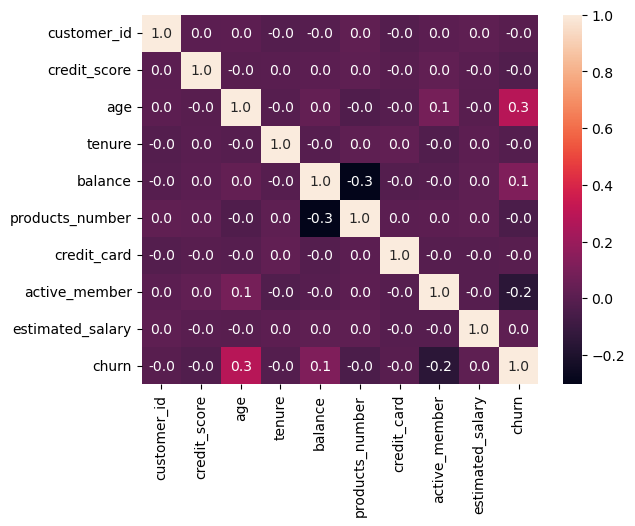

In [158]:
#heatmap to visualize the correlation between the different variables, i.e. columns of the dataset
sns.heatmap(dataset.corr(), annot = True, fmt=".1f")

From the heatmap it is possible to see that some variables have a higher correlation with the fact that a customer is going to churn, e.g. the age seems to influence this variable. Also, variables such as balance and active_member are probably going to be important to predict if a customer is going to churn. 

Since the heatmap only shows the correlations between the numeric variables, in order to see the correlation between the variable 'churn' and the gender or country of origin of the customers, we can analyze the following bar plots:

<AxesSubplot:xlabel='gender', ylabel='churn'>

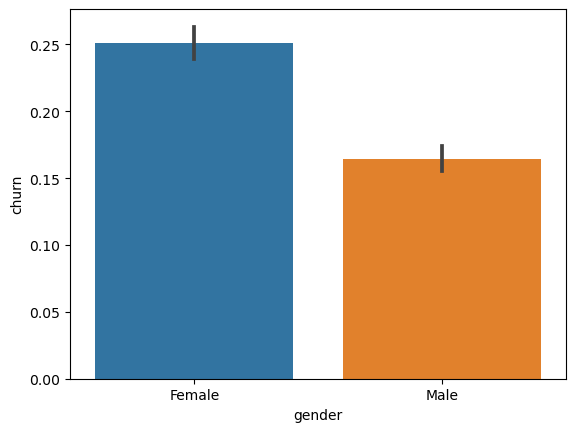

In [159]:
sns.barplot(x = 'gender', y = 'churn', data = dataset)

<AxesSubplot:xlabel='country', ylabel='churn'>

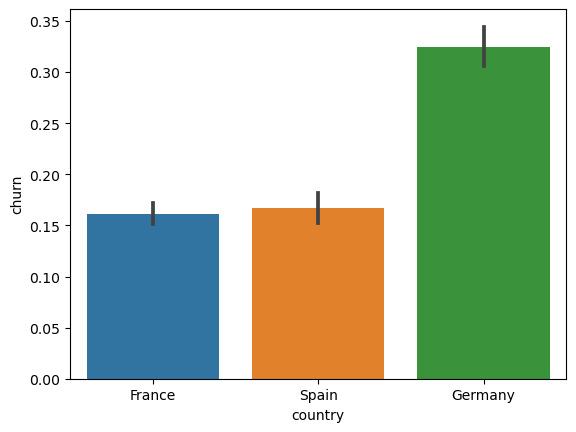

In [160]:
sns.barplot(x = 'country', y = 'churn', data = dataset)

From the analysis it is possible to observe that some of the data is not useful for the prediction of whether the customer is going to churn, so some columns of the dataset can be dropped (e.g. the fact that a customer has a credit card does not seem to influence whether they are going to stop doing business with the company).

In [162]:
#dropping some columns, that do not matter for the prediction, from the dataset

dataset = dataset.drop(['customer_id', 'gender', 'credit_card', 'estimated_salary'], axis = 1)

### Building the model

In [163]:
#using the label encoder in order to numerically encode the data that is presented in string format in the dataset
for column in dataset.columns:
    if dataset[column].dtype == 'O':
        dataset[column] = LabelEncoder().fit_transform(dataset[column])
    else:
        continue

object


In [164]:
#dividing the dataset into the set of features and labels
X = dataset.drop(['churn'], axis=1)
y = dataset['churn']

In [165]:
#splitting the features and the labels into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)

(8000, 7) (2000, 7)


In [166]:
# creating an instance of the model and fitting it to the training data
RandomForest = RandomForestClassifier(n_estimators = 10, min_samples_split = 6, random_state = 0)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=6, n_estimators=10, random_state=0)

In [167]:
#using the model to make predictions on the test set
y_pred = RandomForest.predict(X_test)

### Evaluating the model

In [168]:
# calculating metrics for the evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In order to see if the model is overfitting, it is possible to perform cross validation on the training data and obtain an expected accuracy of the model and its standard deviation:

In [169]:
score = cross_val_score(RandomForest, X_train, y_train)
mean_accuracy = score.mean()
stddev_accuracy = score.std()

print(mean_accuracy, stddev_accuracy)

0.852375 0.011880919577204472


Now the accuracy of the model on the test set can be compared to the expected accuracy calculated above:

In [170]:
assert(np.abs(mean_accuracy - accuracy) < 0.1)
print('The accuracy on the test set and the expected accuracy are close, the model is not overfitting the training data')

The accuracy on the test set and the expected accuracy are close, the model is not overfitting the training data


In [171]:
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', F1)

Accuracy =  0.8635
Precision =  0.7195571955719557
Recall =  0.49744897959183676
F1 score =  0.5882352941176472


During the evaluation of a model it is important to consider various metrics, not only the accuracy. The precision shows how accurately the model predicts that a client is going to churn (high precision - few false positives). The recall score shows if there are many false negatives in the predictions. So, when evaluating the model, it is important to consider where it is going to be applied, this is going to determine which metrics are deemed more important: if the cost of false positives is high, one should pay more attention to the precision, while if the cost of false negatives is high, it would be more important to have a higher recall. 
This model has a higher precision and a lower recall, which goes to show that it is more likely to predict that the customer is not going to churn when in reality he is (more false negatives than false positives). 

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


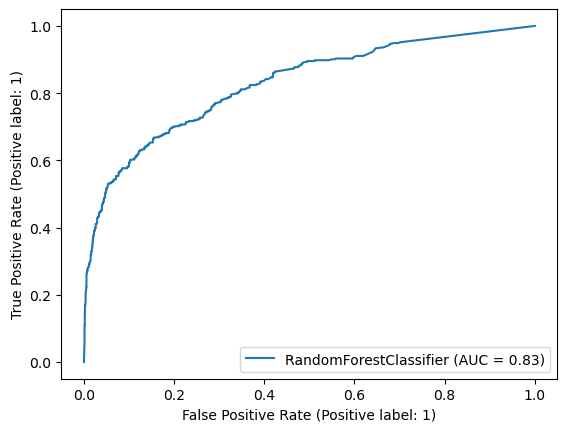

In [172]:
metrics.plot_roc_curve(RandomForest, X_test, y_test)  
plt.show() 

The model's performance can also be evaluated from its ROC curve. Typically, a large area under the curve is an indicator of good performance. In this case the model has an AUC equal to 0.83, which further indicates that the model's predictions are quite good, although not yet optimal.

### Further improvements

In order to further improve the model and to reduce training times (for when the model is trained on very large datasets), it would be possible to analyze the importance each feature has for making the predictions:

<AxesSubplot:>

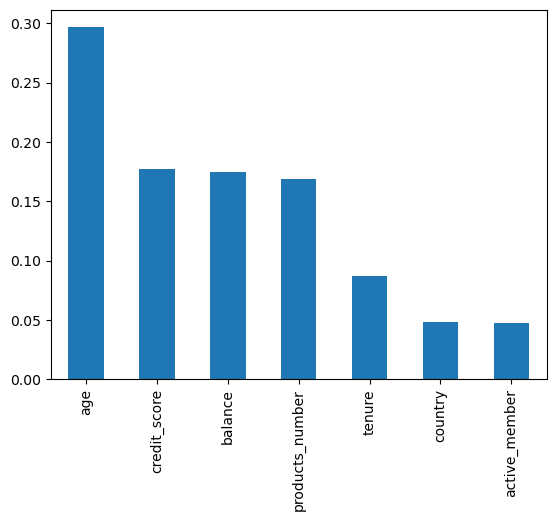

In [174]:
#plotting feature importances 
RandomForest.feature_importances_
feature_importances = pd.Series(RandomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

The bar plot above shows that some of the features passed to the model, such as active_member or country, actually do not influence the model's predictions much. These could thus be removed from the training data without affecting the outcome. 